<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe11-Kruskal's_MinimumSpanningTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema: Kruskal's Minimum Spanning Tree**

**Entrada:** Grafo no dirigido $G=(V,E)$ en el cual cada arco $e$ tiene un costo $c_e$

**Salida:**  Conexiones (arcos) con su peso y los nodos que componen el `Minimum Spanning Tree`.


##*Descripción del problema*

El **problema del árbol recubridor mínimo** trata sobre conectar un conjunto de objetos de la forma más económica posible. Los objetos y conexiones pueden representar computadores y los links entre ellos; documentos y la similitud que existe entre ellos; etc.

El problema emerge de manera natural en varios dominios de aplicación, incluyendo redes de computadores y aprendizaje automático.

Para resolver el problema tenemos que cambiar un poco la forma de verlo, debemos ver los objetos como nodos y las conexiones como arcos con peso, siendo el peso un valor o costo de la conexión.

# **2. Kruskal's Minimum Spanning Tree: Árbol de expansión mínima de Kruskal**

## **2.1. Descripción del algoritmo**

La tarea es encontrar un árbol con mínimo costo que contenga y conecte todos los nodos sin ningún ciclo. Los nodos y el peso de los arcos vienen del grafo no dirigido recibido.

La forma en que realiza esta tarea es simple, realiza los siguientes tres pasos:
* $^{(1)}$ Se busca el arco con menor peso que no esté en el nuevo árbol. Y que no se haya revisado aún.
* $^{(2)}$ Se comprueba si agregar dicho arco no generara ciclo en el nuevo árbol. Si genera ciclos, no se agrega al nuevo árbol. En caso de que no genere se agrega el arco y el nodo al nuevo árbol.
* $^{(3)}$ Luego se repiten los pasos $^{(1)}$ y $^{(2)}$. Esto termina cuando se hayan revisado todos los arcos del grafo de entrada.

Luego de que todos los pasos (revisados todos los arcos del grafo), se tendrán las conexiones y los nodos del nuevo árbol.

El algoritmo de Kruskal utiliza un método **Greedy**, asume que la mejor opción es ir agregando arcos desde el que pesa menos hasta el que pesa más, y coincidentemente para este problema ese enfoque revisa efectivamente todos los casos asi que el algoritmo es correcto.

## **2.2. Código**

### Imports necesarios

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import random

###**Greedy** *(Iniciar la función)*

In [82]:
# Clase especial para acomodar los grafos
# Kruskal es la ultima funcion de la clase
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices # Numero de nodos
        self.graph = [] # Almacena el grafo
    
    # Función para agregar un arco al grafo
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    # Una función de utilidad para encontrar el conjunto de un elemento i
    def find(self, parent, i):
        if parent[i] != i:
            # Reasignación del padre del nodo al nodo raíz 
            # como requiere la compresión de ruta
            parent[i] = self.find(parent, parent[i])
        return parent[i]

    # Una función que hace la unión de dos conjuntos de x e y
    # (usa unión por rango)
    def union(self, parent, rank, x, y):
        # Adjunte un árbol de rango más pequeño debajo de la raíz
        # del árbol de rango alto (Unión por rango)
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
        # Si los rangos son los mismos, haga uno como raíz e incremente su rango en uno
        else:
            parent[y] = x
            rank[x] += 1
    
    # Función que transforma el grafico en la clase a uno graficable por
    # la libreria networkx
    def crearGrafoNx(self,result):
        X = []
        Tree = nx.Graph()
        for u, v, w in result:
            if(u not in X):
                X.append(u)
                Tree.add_node(u)
            if(v not in X):
                X.append(v)
                Tree.add_node(v)
            Tree.add_edge(u,v, weight = w)
        return Tree
    
    # Función para mostrar el grafo recibido por la funcion en la pantalla
    def MostrarGrafo(self, r):
        T = self.crearGrafoNx(r) # Transforma el grafo a uno que networkx puede leer

        # spring_layout: define posiciones para los nodos del grafo
        pos=nx.spring_layout(T)

        # para mostrar los arcos con sus etiquetas
        labels = nx.get_edge_attributes(T,'weight')
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)

        # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
        nx.draw(T,pos, node_color="gray", with_labels=True, node_size=800,
                font_color="white", font_size=14, font_weight="black", width=2.0, edge_color ="black")


    # La función principal para construir MST 
    # (Minimum Spanning Tree) usando el algoritmo de Kruskal.
    def KruskalMST(self, verbose = False, visualize= False):
        result = []  # Esto almacenará el Árbol de expansión mínima resultante.

        # Una variable de índice, utilizada para arcos ordenados.
        i = 0

        # Una variable de índice, utilizada para result[].
        e = 0
  
        # Paso 1: Ordene todos los arcos en orden creciente por su peso.
        # Si no se nos permite cambiar el gráfico dado,
        # podemos crear una copia del gráfico.
        if verbose:
            print("\n*****************************************************************************************************************")
            print(f"Primero hay que ordenar los arcos: {self.graph}.")
        self.graph = sorted(self.graph,
                            key=lambda item:item[2])
        if verbose:
            print(f"Los arcos con menor peso van primero, quedando asi: {self.graph}.")
            print(f"Y se crea el nuevo arbol {result} que no tendra ciclos y conecta los {self.V} nodos.")
            print(f"Nuevo árbol guarda los datos de la siguiente manera [nodo, nodo, peso].")
 
        parent = []
        rank = []
 
        # Crear subconjuntos V con elementos individuales.
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        
        # El número de arcos a tomar es igual a V-1 (siendo V la cantidad de nodos).
        while e < self.V - 1:
            # Paso 2: elija el arco más pequeño
            # e incremente el índice para la próxima iteración.
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            # Si incluir este arco no provoca un ciclo,
            # se agrega en el resultado y se incrementa el índice del resultado
            # para el arco siguiente.
            if verbose: 
                print("----------------------------------------------------------------------------------")
                print(f"Tenemos los arcos en el nuevo árbol: {result}.")
                print(f"Comprobaremos si al agregar el arco [{u},{v}, peso = {w}] se genera ciclo en el nuevo árbol.")
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
                if verbose:
                    print(f"    El arco [{u},{v}, peso = {w}] no generara ciclos en el nuevo árbol. Se agrega al árbol.")
                    print(f"    El nuevo árbol ahora tiene los siguientes arcos: {result}")
                    if e >= self.V - 1: 
                        print(f"    Con el nuevo arco agregadp, el árbol tiene {e-1} arcos para {self.V} nodos.\n" +
                              f"    No puede tener más nodos, entonces el nuevo árbol esta completo.")
            elif verbose:
                print(f"    Si agregamos el arco [{u},{v}, peso = {w}]  el nuevo árbol tendra ciclo, entonces descartamos el arco sin agregarlo al nuevo árbol.")
            # De lo contrario descartar el arco.
        
        if verbose:
            print("----------------------------------------------------------------------------------")
            print("*****************************************************************************************************************\n")
        
        if visualize:
            print("Mostrar árbol de costo minimo")
            self.MostrarGrafo(result)
        
        return result

### Generador de instancias

Grafo al que se aplicara Kruskal:


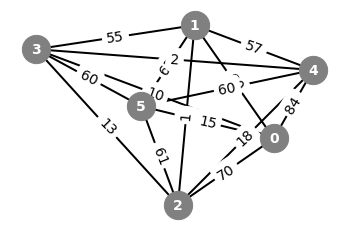

In [115]:
def instanceGenerator(V):
  g = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      g.graph.append([i, j, random.randint(1, 100)])
  
  return g


grafo = instanceGenerator(6)
print("Grafo al que se aplicara Kruskal:")
grafo.MostrarGrafo(grafo.graph)

### Resolviendo grafo aleatorio

In [116]:
# Driver's code
if __name__ == '__main__':
    # Function call
    tree = grafo.KruskalMST()
    minimumCost = 0
    print("Arcos en el árbol de minimo costo construido:")
    print("     %s -- %s | %s" % ("Nodo", "Nodo", "Peso"))
    for u, v, weight in tree:
        minimumCost += weight
        print("     %4d -- %4d | %4d" % (u, v, weight))
    print(f"\nEl costo total del nuevo árbol es de: {minimumCost}")

Arcos en el árbol de minimo costo construido:
     Nodo -- Nodo | Peso
        1 --    2 |    1
        3 --    4 |    2
        0 --    3 |   10
        2 --    3 |   13
        0 --    5 |   15

El costo total del nuevo árbol es de: 41


Mostrar árbol de costo minimo


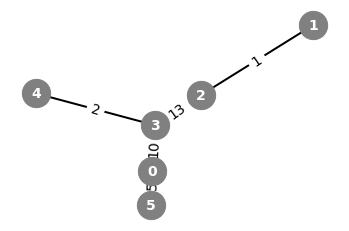

In [117]:
# Mostrar Grafo Resultante
if __name__ == '__main__':
    tree = grafo.KruskalMST(False,True)

## **2.3. Ejecución del algoritmo paso a paso**

In [90]:
n = random.randint(4,8)
print(f"El grafo tendrá {n} nodos")
Grafo = instanceGenerator(n)

El grafo tendrá 7 nodos


Grafo al que se aplicara Kruskal:


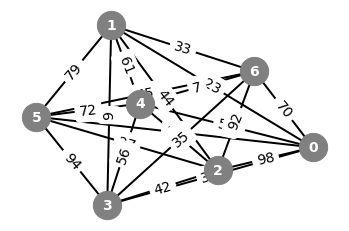

In [91]:
print("Grafo al que se aplicara Kruskal:")
Grafo.MostrarGrafo(Grafo.graph)

###**`verbose=True`**

In [92]:
# Driver's code
if __name__ == '__main__':
    # Function call
    tree = Grafo.KruskalMST(True,False)
    
    minimumCost = 0
    print("Arcos en el árbol de minimo costo construido:")
    print("     %s -- %s | %s" % ("Nodo", "Nodo", "Peso"))
    for u, v, weight in tree:
        minimumCost += weight
        print("     %4d -- %4d | %4d" % (u, v, weight))
    print(f"\nEl costo total del nuevo árbol es de: {minimumCost}")


*****************************************************************************************************************
Primero hay que ordenar los arcos: [[0, 1, 23], [0, 2, 98], [0, 3, 37], [0, 4, 55], [0, 5, 13], [0, 6, 70], [1, 2, 44], [1, 3, 9], [1, 4, 61], [1, 5, 79], [1, 6, 33], [2, 3, 42], [2, 4, 39], [2, 5, 27], [2, 6, 92], [3, 4, 56], [3, 5, 94], [3, 6, 35], [4, 5, 72], [4, 6, 7], [5, 6, 45]].
Los arcos con menor peso van primero, quedando asi: [[4, 6, 7], [1, 3, 9], [0, 5, 13], [0, 1, 23], [2, 5, 27], [1, 6, 33], [3, 6, 35], [0, 3, 37], [2, 4, 39], [2, 3, 42], [1, 2, 44], [5, 6, 45], [0, 4, 55], [3, 4, 56], [1, 4, 61], [0, 6, 70], [4, 5, 72], [1, 5, 79], [2, 6, 92], [3, 5, 94], [0, 2, 98]].
Y se crea el nuevo arbol [] que no tendra ciclos y conecta los 7 nodos.
Nuevo árbol guarda los datos de la siguiente manera [nodo, nodo, peso].
----------------------------------------------------------------------------------
Tenemos los arcos en el nuevo árbol: [].
Comprobaremos si al agrega

###**`visualize=True`**

Mostrar árbol de costo minimo


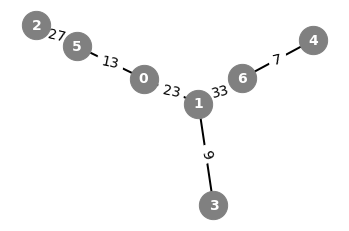

In [93]:
# Driver's code
if __name__ == '__main__':
    # Function call
    tree = Grafo.KruskalMST(False,True)

## **2.4. Ejemplo**

---
---
**Entrada:**

* $[0,1,$ peso $= 14]$
* $[0,2,$ peso $= 5]$
* $[1,2,$ peso $= 7]$

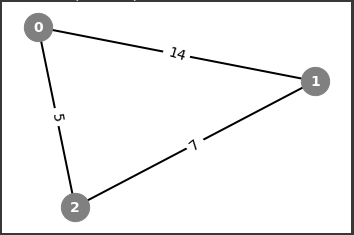

**Image By:** Mi generador de grafos para el problema.

---
---

**Método Kruskal's:**

* Se crea un nuevo árbol que tendrá el costo mínimo $Tree =[]$

* Tenemos el grafo de entrada, primero se ordenan los arcos del grafo por sus pesos $[2,0,$ peso $= 5] , [2,1,$ peso $7] , [1,0,$ peso $14]$.

* Ahora tomamos el de menor peso y comprobamos si genera un ciclo al agregarse en el árbol formado $Tree=[]$, quedaría $Tree = [[2,0,$ peso $= 5]]$, como es solo un arco, nunca se formará ciclo, como no forma ciclo se agrega al nuevo árbol. El método Kruskal siempre incluirá el arco con menor peso en el nuevo árbol

* A continuación tomamos el segundo de menor peso $[2,1,$ peso $7]$ y vemso si al agregarlo forma un ciclo, los arcos $[2,0],[2,1]$ no forman ciclos, es imposible que 2 arcos formen ciclos asi que el segundo arco más pequeño al usar Kruskal siempre se agregara al nuevo arbol igual que el primero. $Tree = [[2,0,$ peso $= 5] , [2,1,$ peso $7]]$

* En este punto el árbol tiene 2 arcos, el grafo entregado tenia 3 nodos, se sabe que el árbol de minimo costo tendra $arcos = nodos-1$, como nos encontramos en esta situación no revisaremos los demas arcos.

* Ahora que revisamos todos los arcos del grafo de entrada tenemos el nuevo árbol y se envía de salida.


---
---
**Salida:**

$Tree = [[2,0,$ peso $= 5] , [2,1,$ peso $7]]$

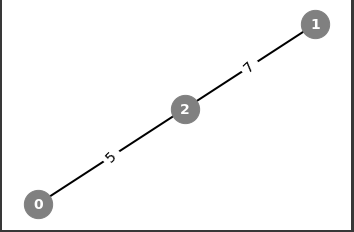

**Image By:** Mi generador de grafos para el problema.

Podemos ver cada arco por separado, y al sumar sus costos se puede obtener el costo del árbol fácilmente.
* $[2,0,$ peso $= 5]$
* $[2,1,$ peso $= 7]$

El costo total del nuevo árbol es de: $12$

---
---

# **3. Correctitud**

## **Greedy**

### **Teorema (Correctitud).**

El algoritmo entrega un árbol de costo mínimo que conecta todos los nodos conectados por arcos con distintos pesos sin formar ciclos, estos nodos y arcos son entregados en forma de Grafo no dirigido (dicho grafo puede tener ciclos).

### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Kruskal's: Minimum Spanning Tree`:

> Al comienzo de cada iteración $i$ del bucle, tendremos un árbol con $e$ arcos sin que se formen ciclos ni que la cantidad de arcos iguale o supere la cantidad de nodos que deber tener el árbol.

Se busca que el nuevo árbol tenga $V$ nodos (igual que el grafo de entrada) y $V-1=e$ arcos.

$i$ es el arco que se revisa.

El **Kruskal** usado aplica el algoritmo **Union-Find**, un algoritmo correcto que nos permite saber si se forma ciclo en un grafo.

#### **Inicialización**

En la primera iteración $i=1$, tendremos un árbol vacío y revisaremos el arco $i$, que tiene el menor peso, se usa **Union-Find** para saber si agregar el arco provoca ciclos. Es imposible que se forme un ciclo con menos de 3 arcos, como el árbol esta vacío, agregar un arco no formara un ciclo y se agrega al árbol.



#### **Mantención**

Aplicando inducción, asumimos que, al comienzo de cada iteración, se cumple la propiedad. Es decir, en la iteración donde probamos agregar el arco $i$ al árbol, tenemos un árbol con los arcos $e = 1...i-1$ que no forman ciclos agregados, siendo los agregados $V-1$ siendo $V$ los nodos que buscamos agregar en el árbol.

Consideremos que $i=x$ como el arco que buscamos agregar con $1 < x < V$.

Se revisa el arco $x$, si ambos nodos del arco pertenecen al mismo sub-conjunto en el grafo entonces forman ciclo y no se agregarán al nuevo árbol de costo mínimo, en caso contrario se agregan al nuevo árbol. Esto se comprueba calculando el subconjunto al que pertenece cada nodo con **Find** del algoritmo **Union-Find**.

**Find** nos da un nombre para el subconjunto al que pertenece un nodo usando una lista con todos los nodos, se usa en ambos nodos del arco, si están presentes en el mismo subconjunto entonces forman un ciclo. La lista de nodos debe crearse desde los arcos **ya ordenados por peso**.

Cada vez que se agregue al nuevo árbol un arco que no genere ciclo, se revisa si la cantidad de arcos $e$ es igual a nodos $V$ menos 1, si $e = V-1$, entonces tenemos el árbol de costo mínimo porque no podemos agregar nodos más sin que se forme algún ciclo en el árbol.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

####**Correctitud**

Finalmente, como la **propiedad de bucle invariante** es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $i$-ésima iteración del bucle donde $e = V-1$, se tendra un árbol con $V$ nodos conectados sin formar ningun ciclo.

# **4. Tiempo de ejecución**

##**Greedy**

###*Teorema (Complejidad Temporal).*

*El algoritmo `Kruskal's: Minimum Spanning Tree` implementado a traves de **Greedy** tiene un **tiempo de ejecución** de $O(E * Log(V))$ o $O(E * log(E))$.*

####*Prueba del teorema.*

#####Lógica

Para la resolución de este problema hay que tener ordenados los arcos de menor a mayor por su peso. Tenemos E arcos que ordenar, se utiliza sorted para ordenarlos, Complejidad temporal de la operación $\rightarrow O(E * log(E))$.

Se revisan y posiblemente agregan arcos al árbol siempre que la cantidad de arcos en el árbol de costo mínimo $e$ no sea igual a $V-1$. Esto se hace con **Union-Find** que toma como máximo $O(log(V))$ realizadas para los $E$ arcos del grafo de entrada. Complejidad temporal de la operación $\rightarrow O(E * log(V))$.

Al final podemos decir que la complejidad total de Kruskal es $O(E * log(E)) + O(E * log(V)) ⇒ $O(E * log(E) + E * log(V)) = O(E * (log(E) + log(V)))$.

* $V =$ es la cantidad de nodos que tiene el grafo de entrada.
* $E =$ es la cantidad de arcos que tiene el grafo de entrada. $V-1 \leq E < 2V$

Podemos decir que en tiempos de ejecución $O(E) = O(V)$, por ende $O(log(E)) = O(log(V))$.

Por eso $E * (log(E) + log(V))) = E * (2 * log(E)) \rightarrow  O(E * log(E)) = E * (2 * log(V)) \rightarrow  O(E * log(V)) $.

Como la $O(E * log(V)) = O(E * log(E))$ podemos decir que cualquiera de los dos es la complejidad de Kruskal.

Pero, aunque se pueden igualar $O(E * log(V)) = O(E * log(E))$, para mayor precisión se recomienda usar $O(E * log(V))$, porque $E=V$ no siempre es aplicable, ya que la cantidad de nodos y aristas puede ser muy diferente.

Por supuesto, en los casos donde es recomendable usar Kruskal, $E$ tiende a $V$, asi que comúnmente se toman como correcta ambas

Por ende, la complejidad del método es la complejidad del bucle, es decir, el método **Greedy** para este problema tiene complejidad $O(E * log(V))$ o $O(E * log(E))$.


# **5. Experimentos** 

## **5.1. Tiempo de ejecución a medida que aumentan los nodos**

### **Comparación de Gráficas** (Tiempo de ejecución)

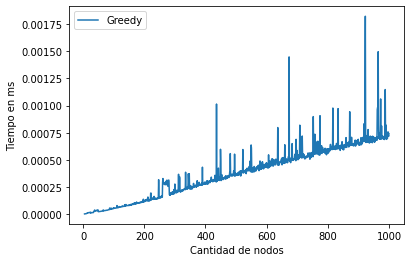

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,1000):
    grafo = instanceGenerator(n)

    #la función repeat está ejecutando 10 veces Kruskal con el grafo de n nodos y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import Graph", stmt=f"{grafo.KruskalMST()}", repeat=1, number=10)

    x.append(n)
    y.append(t)


plt.plot(x,y)
plt.legend(["Greedy"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Es un algoritmo extremadamente rápido, incluso con grafos $1000$ nodos no tarda ni siquiera $0.01$ milisegundos en conseguir la respuesta.

Podemos decir que es un algoritmo que soluciona el problema extremadamente rápido, como es de esperarse de un algoritmo que aplica un método **Greedy**, la rapidez con que llega a una respuesta es inmensa, porque se concentra en obtener un resultado en el menor tiempo posible.

## **5.2. Tiempo de ejecución: Prim(Bottom-up) vs Kruskal(Greedy)**

### **Prim**

In [94]:
import sys  # Library for INT_MAX
 
 
class Graph2():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def MST(self, parent):
        r = []
        for i in range(1, self.V):
            r.append([parent[i], i, self.graph[i][parent[i]]])
        return r
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
        # Initialize min value
        min = sys.maxsize
        min_index = -1
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1  # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        
        return self.MST(parent)

def graphToGraph2(G, n):
    g = Graph2(n)

    for u,v,w in G.graph:
        g.graph[u-1][v-1] = w
        g.graph[v-1][u-1] = w

    return g

# Driver's code
if __name__ == '__main__':
    g = instanceGenerator(4)
    gr = graphToGraph2(g,4)
 
    arbol = gr.primMST()
    print(arbol)

[[0, 1, 6], [3, 2, 26], [0, 3, 27]]


### **Comparación de Gráficas** (Tiempo de ejecución)

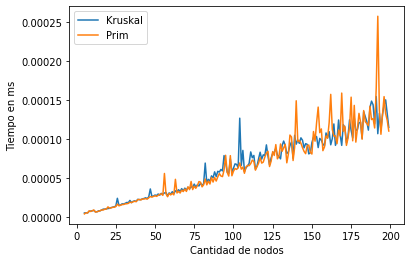

In [114]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,200):
    grafo = instanceGenerator(n)
    grafo2 = graphToGraph2(grafo,n)

    #la función repeat está ejecutando 10 veces Kruskal con el grafo de n nodos y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import Graph", stmt=f"{grafo.KruskalMST()}", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import Graph2", stmt=f"{grafo2.primMST()}", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Kruskal", "Prim"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

El tiempo de ejecución de **Prim** es $O(V^2)$, mucho mayor que $O(E * log(V))$ de **Kruskal**, aun asi vemos que ambos algoritmo tienen un tiempo de ejecución casi igual.

Hablemos de sus tiempos de ejecución, primero hay que saber qué $E$ son los arcos y $V$ son los nodos. Podemos ver que el tiempo de ejecución de **Kruskal** depende de los arcos y los nodos, mientras que **Prim** solo depende de los nodos.

Ahora veamos cómo funciona el generador de instancias, funciona de tal forma que el grafo contendrá muchos ciclos, es decir, la cantidad de $E$ serán mucho mayor que $V$, podemos decir que $V < E \leq V^2$ debido a que el grafo tendrá muchos ciclos. Por eso tomamos $O(E * log(V))$ como tiempo de ejecución de **Kruskal**. 

Conociendo de que depende cada uno, y sabiendo cómo funciona el generador de instancias, podemos empezar a ver porque tienen tiempo de ejecución similares. Debido a que la cantidad de arcos excede por mucho la cantidad de nodos, **Kruskal** crece enormemente, siendo casi igual a **Prim**, a veces incluso siendo más lento que **Prim**, únicamente debido a los grafos generados.